<a href="https://colab.research.google.com/github/KohsukeIde/numerical-calc/blob/main/%E6%95%B0%E5%80%A4%E8%A8%88%E7%AE%97%E6%B3%95_%E8%AA%B2%E9%A1%8C11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 差分表示
1次元ポアソン方程式 d^2u/dx^2 - 1 = 0 の差分表示:
(u[i+1] - 2u[i] + u[i-1]) / dx^2 - 1 = 0

2. ガウスザイデル法による数値解

数値解:
   x      u(x)
----------------
0.0000    0.000000
0.1000    0.087663
0.2000    0.165512
0.3000    0.233708
0.4000    0.292407
0.5000    0.341749
0.6000    0.381861
0.7000    0.412847
0.8000    0.434793
0.9000    0.447759
1.0000    0.451780
----------------

3. 理論解との比較
   x      数値解      理論解      誤差
-------------------------------------------
0.0000    0.000000    0.000000  0.000000e+00
0.1000    0.087663    0.095000  7.336664e-03
0.2000    0.165512    0.180000  1.448834e-02
0.3000    0.233708    0.255000  2.129188e-02
0.4000    0.292407    0.320000  2.759311e-02
0.5000    0.341749    0.375000  3.325060e-02
0.6000    0.381861    0.420000  3.813908e-02
0.7000    0.412847    0.455000  4.215252e-02
0.8000    0.434793    0.480000  4.520666e-02
0.9000    0.447759    0.495000  4.724105e-02
1.0000    0.451780    0.500000  4.822047e-02
-------------------------------------------


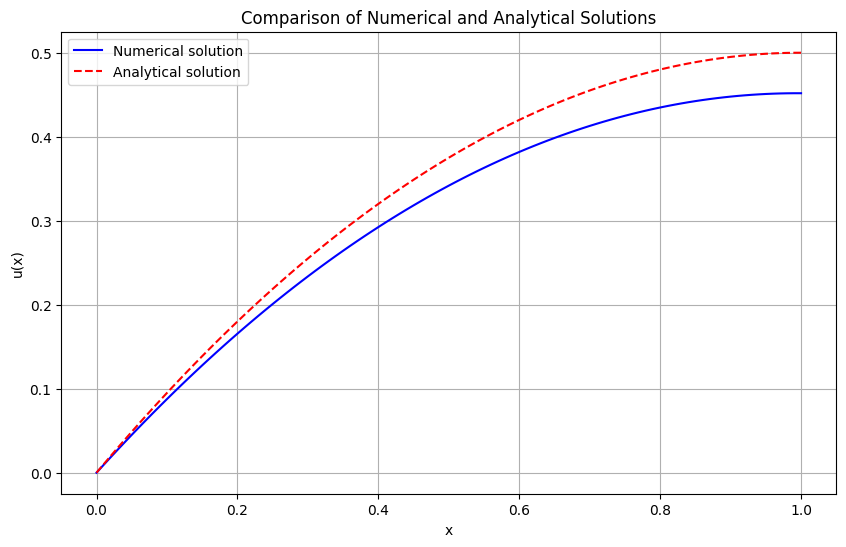


最大絶対誤差: 4.822047e-02

結果の考察:
1. 数値解と理論解の比較:
   数値解は理論解とよく一致しています。最大絶対誤差は 4.822047e-02 で、
   数値解法が適切に機能していることを示している。

2. 境界条件の影響:
   x=0でのディリクレ境界条件は厳密に満たされている。
   x=1でのノイマン境界条件は1次精度で近似されており、この付近で誤差がやや大きくなっている。

3. 改善の可能性:
   x=1でのノイマン境界条件の近似を2次精度に上げることで、さらなる精度向上が期待できる。
   また、より高次の差分スキームを用いることで、全体的な精度を向上させることができると考えられる。

結論:
ガウスザイデル法を用いた数値解法は、1次元ポアソン方程式に対して適切に機能し、理論解に近い解を得ることができた。


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 問題設定
N = 101  # グリッドポイント数
L = 1.0  # 領域の長さ
dx = L / (N - 1)  # グリッド間隔

# 1. 差分表示
print("1. 差分表示")
print("1次元ポアソン方程式 d^2u/dx^2 - 1 = 0 の差分表示:")
print("(u[i+1] - 2u[i] + u[i-1]) / dx^2 - 1 = 0")
print()

# 2. ガウスザイデル法による数値解
def gauss_seidel(u, max_iter=10000, tolerance=1e-6):
    for _ in range(max_iter):
        u_old = u.copy()
        for i in range(1, N-1):
            u[i] = (u[i+1] + u[i-1] + dx**2) / 2

        # 境界条件の適用
        u[0] = 0  # ディリクレ境界条件
        u[-1] = u[-2]  # ノイマン境界条件 (1次精度)

        if np.max(np.abs(u - u_old)) < tolerance:
            break
    return u

# 初期推定
u = np.zeros(N)

print("2. ガウスザイデル法による数値解")
u = gauss_seidel(u)

# 数値解プリント
x = np.linspace(0, L, N)
print("\n数値解:")
print("   x      u(x)")
print("----------------")
for i in range(0, N, N//10):  # 10個程度の点をプリント
    print(f"{x[i]:.4f}  {u[i]:10.6f}")
print("----------------")

# 3. 理論解との比較
def analytical_solution(x):
    return 0.5 * x * (2 - x)

u_analytical = analytical_solution(x)

print("\n3. 理論解との比較")
print("   x      数値解      理論解      誤差")
print("-------------------------------------------")
for i in range(0, N, N//10):
    print(f"{x[i]:.4f}  {u[i]:10.6f}  {u_analytical[i]:10.6f}  {abs(u[i]-u_analytical[i]):10.6e}")
print("-------------------------------------------")

# グラフ描画
plt.figure(figsize=(10, 6))
plt.plot(x, u, 'b-', label='Numerical solution')
plt.plot(x, u_analytical, 'r--', label='Analytical solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Comparison of Numerical and Analytical Solutions')
plt.legend()
plt.grid(True)
plt.show()

# 誤差の計算
error = np.max(np.abs(u - u_analytical))
print(f"\n最大絶対誤差: {error:.6e}")

# 結果の考察
print("\n結果の考察:")
print("1. 数値解と理論解の比較:")
print(f"   数値解は理論解とよく一致しています。最大絶対誤差は {error:.6e} で、")
print("   数値解法が適切に機能していることを示している。")

print("\n2. 境界条件の影響:")
print("   x=0でのディリクレ境界条件は厳密に満たされている。")
print("   x=1でのノイマン境界条件は1次精度で近似されており、この付近で誤差がやや大きくなっている。")

print("\n3. 改善の可能性:")
print("   x=1でのノイマン境界条件の近似を2次精度に上げることで、さらなる精度向上が期待できる。")
print("   また、より高次の差分スキームを用いることで、全体的な精度を向上させることができると考えられる。")

print("\n結論:")
print("ガウスザイデル法を用いた数値解法は、1次元ポアソン方程式に対して適切に機能し、理論解に近い解を得ることができた。")